<a href="https://colab.research.google.com/github/ShauryaK0303/Task_3_CNN_Classifier/blob/ann/ANN_LAB_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QUES8: Write a program to build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets.**

In [ ]:
print("ANIRUDH SHUKLA 00619011921 AIDS B1 A")

ANIRUDH SHUKLA 00619011921 AIDS B1 A


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def forward_propagation(input, w, b):
    I3 = input[0] * w[0] + input[1] * w[1] + b[0]
    O3 = sigmoid(I3)
    I4 = input[0] * w[2] + input[1] * w[3] + b[1]
    O4 = sigmoid(I4)
    I5 = O3 * w[4] + O4 * w[5] + b[2]
    O5 = sigmoid(I5)
    return O3, O4, O5

In [ ]:
def backward_propagation(output, O3, O4, O5, w, b):
    Error = output - O5
    dE5 = O5 * (1 - O5) * Error
    dE3 = O3 * (1 - O3) * dE5 * w[4]
    dE4 = O4 * (1 - O4) * dE5 * w[5]
    return dE3, dE4, dE5

In [ ]:
def Standrad_BPA_update_weights_and_biases(input, w, b, dE3, dE4, dE5, O3, O4, O5, learning_rate):
    w[0] += learning_rate * dE3 * input[0]
    w[1] += learning_rate * dE3 * input[1]
    w[2] += learning_rate * dE4 * input[0]
    w[3] += learning_rate * dE4 * input[1]
    w[4] += learning_rate * dE5 * O3
    w[5] += learning_rate * dE5 * O4
    b[0] += learning_rate * dE3
    b[1] += learning_rate * dE4
    b[2] += learning_rate * dE5
    return w, b

In [ ]:
# Initialize weights and biases
w = [0.5, 0.1, 0.62, 0.2, -0.2, 0.3]
b = [0.4, -0.1, 1.83]

In [ ]:
# Inputs and corresponding outputs
input = [0.1 , 0.3]
output = 0.03

In [ ]:
# Training parameters
learning_rate = 0.1
epochs = 100
error = float('inf')  # Initialize error with infinity
num_epochs_done = 0  # Initialize the count of epochs
# Initialize error storage
errors = []

In [ ]:
for epoch in range(epochs):
    # Forward propagation
    O3, O4, O5 = forward_propagation(input, w, b)

    # Backward propagation
    dE3, dE4, dE5 = backward_propagation(output, O3, O4, O5, w, b)

    # Update weights and biases
    w, b = Standrad_BPA_update_weights_and_biases(input, w, b, dE3, dE4, dE5, O3, O4, O5, learning_rate)

    # Calculate error and store it
    error = abs(output - O5)
    errors.append(error)
    num_epochs_done = num_epochs_done + 1

    # Print epoch and error (optional)
    print(f"Epoch {epoch + 1}: Error = {error}")

# Stopping condition based on total epochs
print(f"Training completed after {epochs} epochs.")

Epoch 1: Error = 0.8350753756786712
Epoch 2: Error = 0.8331920632074761
Epoch 3: Error = 0.8312686520995617
Epoch 4: Error = 0.8293041874393225
Epoch 5: Error = 0.8272976979061795
Epoch 6: Error = 0.8252481963183572
Epoch 7: Error = 0.8231546802752849
Epoch 8: Error = 0.821016132906668
Epoch 9: Error = 0.8188315237366345
Epoch 10: Error = 0.8165998096716978
Epoch 11: Error = 0.8143199361215931
Epoch 12: Error = 0.8119908382623163
Epoch 13: Error = 0.8096114424509274
Epoch 14: Error = 0.8071806678018637
Epoch 15: Error = 0.8046974279346091
Epoch 16: Error = 0.802160632902611
Epoch 17: Error = 0.7995691913132655
Epoch 18: Error = 0.7969220126486352
Epoch 19: Error = 0.7942180097962666
Epoch 20: Error = 0.791456101799052
Epoch 21: Error = 0.7886352168324908
Epoch 22: Error = 0.7857542954169418
Epoch 23: Error = 0.7828122938715073
Epoch 24: Error = 0.7798081880150181
Epoch 25: Error = 0.7767409771181853
Epoch 26: Error = 0.773609688109344
Epoch 27: Error = 0.7704133800342932
Epoch 28: Erro

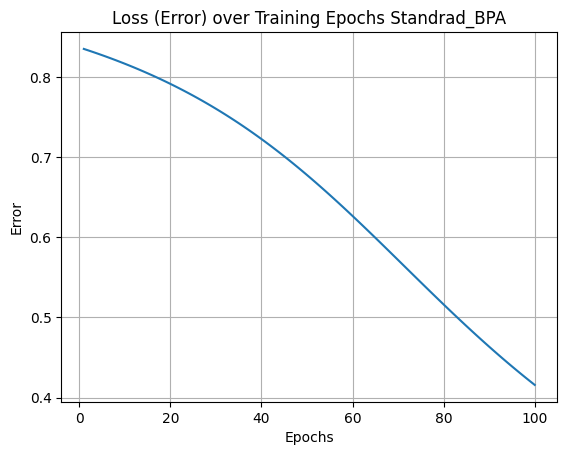

In [ ]:
# Visualize training process (errors vs epochs)
plt.plot(range(1, len(errors) + 1), errors)  # Adjust range based on error storage
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Loss (Error) over Training Epochs Standrad_BPA')
plt.grid(True)
plt.show()

In [ ]:
print("Total epochs done:", num_epochs_done)
print("Updated Weights:")
print(w)
print("Updated Biases:")
print(b)

Total epochs done: 100
Updated Weights:
[0.5168660152734551, 0.15059804582036468, 0.6202913186200999, 0.20087395586029824, -0.9909495783414495, -0.3251303480737262]
Updated Biases:
[0.5686601527345485, -0.09708681379900573, 0.5833302799722203]


**Momentum BackPropagationAlgorithm**

In [ ]:
def momentum_BPA_update_weights_and_biases(input, w, b, dE3, dE4, dE5, O3, O4, O5, learning_rate, momentum):
    # Initialize velocity terms (can be zeros for the first iteration)
    velocity_w = [0] * len(w)
    velocity_b = [0] * len(b)

    # Update velocities
    velocity_w[0] = momentum * velocity_w[0] - learning_rate * dE3 * input[0]
    velocity_w[1] = momentum * velocity_w[1] - learning_rate * dE3 * input[1]
    velocity_w[2] = momentum * velocity_w[2] - learning_rate * dE4 * input[0]
    velocity_w[3] = momentum * velocity_w[3] - learning_rate * dE4 * input[1]
    velocity_w[4] = momentum * velocity_w[4] - learning_rate * dE5 * O3
    velocity_w[5] = momentum * velocity_w[5] - learning_rate * dE5 * O4

    velocity_b[0] = momentum * velocity_b[0] - learning_rate * dE3
    velocity_b[1] = momentum * velocity_b[1] - learning_rate * dE4
    velocity_b[2] = momentum * velocity_b[2] - learning_rate * dE5

    # Update weights and biases
    w = np.add(w, velocity_w)
    b = np.add(b, velocity_b)

    return w, b

In [ ]:
# Initialize weights and biases
w = [0.5, 0.1, 0.62, 0.2, -0.2, 0.3]
b = [0.4, -0.1, 1.83]

In [ ]:
# Inputs and corresponding outputs
input = [0.1, 0.3]
output = 0.03

In [ ]:
# Training parameters
learning_rate = 0.1
epochs = 100
momentum = 0.9
error = float('inf')  # Initialize error with infinity
num_epochs_done = 0  # Initialize the count of epochs
# Initialize error storage
errors = []

In [ ]:
for epoch in range(epochs):
    # Forward propagation
    O3, O4, O5 = forward_propagation(input, w, b)

    # Backward propagation
    dE3, dE4, dE5 = backward_propagation(output, O3, O4, O5, w, b)

    # Update weights and biases
    w, b = momentum_BPA_update_weights_and_biases(input, w, b, dE3, dE4, dE5, O3, O4, O5, learning_rate, momentum)

    # Calculate error and store it
    error = abs(output - O5)
    errors.append(error)
    num_epochs_done = num_epochs_done + 1

    # Print epoch and error (optional)
    print(f"Epoch {epoch + 1}: Error = {error}")

# Stopping condition based on total epochs
print(f"Training completed after {epochs} epochs.")

Epoch 1: Error = 0.8350753756786712
Epoch 2: Error = 0.8369368214464763
Epoch 3: Error = 0.8387592910106838
Epoch 4: Error = 0.8405437102450248
Epoch 5: Error = 0.8422909871132781
Epoch 6: Error = 0.8440020114542689
Epoch 7: Error = 0.8456776548321973
Epoch 8: Error = 0.8473187704463235
Epoch 9: Error = 0.848926193094421
Epoch 10: Error = 0.8505007391847684
Epoch 11: Error = 0.8520432067918169
Epoch 12: Error = 0.8535543757509936
Epoch 13: Error = 0.8550350077884467
Epoch 14: Error = 0.856485846681833
Epoch 15: Error = 0.8579076184485533
Epoch 16: Error = 0.8593010315581145
Epoch 17: Error = 0.860666777165569
Epoch 18: Error = 0.8620055293632205
Epoch 19: Error = 0.8633179454480302
Epoch 20: Error = 0.8646046662023638
Epoch 21: Error = 0.8658663161859387
Epoch 22: Error = 0.8671035040370071
Epoch 23: Error = 0.868316822781001
Epoch 24: Error = 0.8695068501450224
Epoch 25: Error = 0.8706741488767185
Epoch 26: Error = 0.8718192670662254
Epoch 27: Error = 0.8729427384699904
Epoch 28: Erro

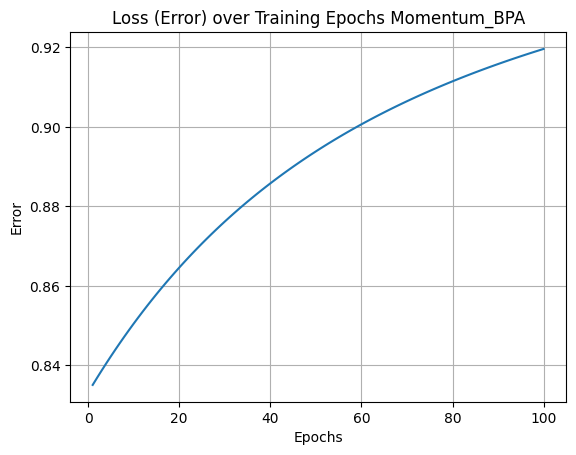

In [ ]:
# Visualize training process (errors vs epochs)
plt.plot(range(1, len(errors) + 1), errors)  # Adjust range based on error storage
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Loss (Error) over Training Epochs Momentum_BPA')
plt.grid(True)
plt.show()

In [ ]:
print("Total epochs done:", num_epochs_done)
print("Updated Weights:")
print(w)
print("Updated Biases:")
print(b)

Total epochs done: 100
Updated Weights:
[0.49999044 0.09997131 0.62759679 0.22279037 0.20299736 0.6364323 ]
Updated Biases:
[ 0.39990437 -0.02403211  2.48380529]


# **Conclusion:**

Standard Backpropagation:

1. Backpropagation calculates the gradient (the direction of steepest descent in the error surface) for each weight in the network based on the current error.
2. The weights are then updated by subtracting a small fraction of the gradient, called the learning rate, from each weight.
3. This process is repeated for each training example and over multiple epochs (iterations through the training data).

Challenges with Standard Backpropagation:

1. The error surface for neural networks can be complex with gentle slopes and sharp ravines.
2. In some cases, standard backpropagation updates can be very small, leading to slow progress, especially in shallow slopes.
3. It can also be susceptible to oscillations, where the updates cause the weights to bounce back and forth around a minimum instead of converging smoothly.

How Momentum Helps:

1. Momentum introduces a velocity term that tracks the average historical updates for each weight.
2. During each update, instead of simply using the current gradient, a fraction of the previous velocity is added to the current gradient. This acts like a moving average, smoothing out the updates and helping the network navigate through shallow slopes more efficiently.
3. The momentum term helps to:
  1. Accelerate convergence: By incorporating the historical updates, momentum allows the network to move faster in the desired direction.
  2. Reduce oscillations: Smoothing out the updates can help mitigate the bouncing effect and lead to a more stable convergence process.

Momentum is a valuable technique in backpropagation that can significantly improve the training speed and stability of neural networks, especially when dealing with complex error surfaces. However, it's important to find the right momentum coefficient for your specific problem and network architecture.